In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import scipy.io as sio
from dataclasses import dataclass
from typing import List, Tuple
import os
from dotenv import load_dotenv
load_dotenv()
import tidy3d as td
from tidy3d import web
import numpy as np
from pathlib import Path
from stl import mesh
import matplotlib.pyplot as plt
import re

In [2]:
import sys
import os

# Assuming /AutomationModule is in the root directory of your project
sys.path.append(os.path.abspath(fr'H:\phd stuff\tidy3d'))

from AutomationModule import * 

import AutomationModule as AM

In [3]:
tidy3dAPI = os.environ["API_TIDY3D_KEY"]


In [4]:
lambdas = np.array([10,2.5])*0.8

In [5]:
folder_path = rf"./Structures"
project_name = "20250916 ff_0.15-0.25_n_3.2"
postprocess_results = []
runtime_ps = 25e-12
min_steps_per_lambda = 20
cuts=[1]
h5_bg = None
ref = True
for direction in ["z"]: 
    for dirpath, dirnames, filenames in os.walk(folder_path):
        try:
            for filename in filenames:
                if filename.endswith(".h5"):
                    ff = float(re.search(r'ff_([+-]?\d+(?:\.\d+)?)', filename).group(1))
                    n_value = float(re.search(r'n_([+-]?\d+(?:\.\d+)?)', filename).group(1))
                    for cut in cuts:
                        if not (Path(filename).suffix==".h5" or Path(filename).suffix==".stl"):
                            continue 
                        if os.path.isfile(os.path.join(dirpath, filename)):
                            file=os.path.join(dirpath, filename)
                            structure_1 = AM.loadAndRunStructure(key = tidy3dAPI, file_path=file
                                                            ,direction=direction, lambda_range=lambdas,
                                                            box_size=14.3*0.8,runtime_ps=runtime_ps,min_steps_per_lambda=min_steps_per_lambda,
                                                           scaling=1,shuoff_condtion=1e-20, verbose=True, 
                                                           monitors=["flux"], flux_monitor_position=18,cell_size_manual=45,
                                                           freqs=400, 
                                                           cut_condition=cut, source="planewave", absorbers=130, use_permittivity=False,sim_name=rf"{Path(filename).stem}_size_{cut}" + (rf"_bg_{h5_bg}" if h5_bg else ""),h5_bg=h5_bg,
                                                           )
                            folder_desc = rf"H:\phd stuff\tidy3d\data\{project_name}\n_{n_value:.2f}"
                            os.makedirs(folder_desc, exist_ok=True)
                            sim_name=rf"LSU_ff_{ff}_size_{cut}_n_{n_value:.2f}"
                            if os.path.exists(os.path.join(folder_desc, sim_name+".txt")):
                                print("Exist!")
                            else:
                                id =web.upload(structure_1.sim, folder_name=project_name,task_name=sim_name, verbose=True)
                                # structure_1.plot_sim_layout()
                                ids = '\n' + id
                                with open(os.path.join(folder_desc, sim_name+".txt"), "w") as file:
                                    # Write the string to the file
                                    file.write(ids)
                                web.start(task_id = id)
                                # web.monitor(task_id=id,verbose=True)
                            # del structure_1
                            # structure_1.estimate_cost()
                            # raise(Exception)


        except Exception as e:
            print(f"Error processing {dirpath}: {e}")
            continue
        
    



Configured successfully.
Exist!
Configured successfully.


17:06:26 W. Europe Daylight Time Created task 'LSU_ff_0.1605_size_1_n_3.20' with
                                 task_id                                        
                                 'fdve-5fec0b2b-3040-43a6-a36f-ae6704382c13' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=946779;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5fec0b2b-3040-43a6-a36f-ae6704382c13\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=905555;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5fec0b2b-3040-43a6-a36f-ae6704382c13\task]8;;\
                                 ]8;id=905555;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5fec0b2b-3040-43a6-a36f-ae6704382c13\Id]8;;\]8;id=946779;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5fec0b2b-3040-43a6-a36f-ae6704382c13\=]8;;\]8;id=298190;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5fec0b2b-3040-43a6-a36f-ae6704382c13\fdve]8;;\]8;id=946779;https://tidy3d.simulation.cloud/workbench?taskId=fdve-5fec0b2b-3040-43a6-a36f-ae6704382c13\-5fec0b2b-3040-43a6-a36f-ae6704382c13']8;;\.

                                 Task folder: ]8;id=460807;https://tidy3d.simulation.cloud/folders/folder-669d4763-f017-4eb1-a036-fd1958a41789\'20250916 ff_0.15-0.25_n_3.2']8;;\.

Output()

17:07:04 W. Europe Daylight Time Maximum FlexCredit cost: 3.062. Minimum cost   
                                 depends on task execution details. Use         
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

Configured successfully.


17:07:26 W. Europe Daylight Time Created task 'LSU_ff_0.17_size_1_n_3.20' with  
                                 task_id                                        
                                 'fdve-2d34f233-9480-4b60-9568-354e96b84a41' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=694148;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2d34f233-9480-4b60-9568-354e96b84a41\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=48955;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2d34f233-9480-4b60-9568-354e96b84a41\task]8;;\
                                 ]8;id=48955;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2d34f233-9480-4b60-9568-354e96b84a41\Id]8;;\]8;id=694148;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2d34f233-9480-4b60-9568-354e96b84a41\=]8;;\]8;id=781009;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2d34f233-9480-4b60-9568-354e96b84a41\fdve]8;;\]8;id=694148;https://tidy3d.simulation.cloud/workbench?taskId=fdve-2d34f233-9480-4b60-9568-354e96b84a41\-2d34f233-9480-4b60-9568-354e96b84a41']8;;\.

                                 Task folder: ]8;id=386155;https://tidy3d.simulation.cloud/folders/folder-669d4763-f017-4eb1-a036-fd1958a41789\'20250916 ff_0.15-0.25_n_3.2']8;;\.

Output()

17:08:00 W. Europe Daylight Time Maximum FlexCredit cost: 3.062. Minimum cost   
                                 depends on task execution details. Use         
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

Configured successfully.


17:08:23 W. Europe Daylight Time Created task 'LSU_ff_0.18_size_1_n_3.20' with  
                                 task_id                                        
                                 'fdve-a9cd72ed-2335-4882-a668-16fdd998e76d' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=592634;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a9cd72ed-2335-4882-a668-16fdd998e76d\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=235756;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a9cd72ed-2335-4882-a668-16fdd998e76d\task]8;;\
                                 ]8;id=235756;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a9cd72ed-2335-4882-a668-16fdd998e76d\Id]8;;\]8;id=592634;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a9cd72ed-2335-4882-a668-16fdd998e76d\=]8;;\]8;id=146754;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a9cd72ed-2335-4882-a668-16fdd998e76d\fdve]8;;\]8;id=592634;https://tidy3d.simulation.cloud/workbench?taskId=fdve-a9cd72ed-2335-4882-a668-16fdd998e76d\-a9cd72ed-2335-4882-a668-16fdd998e76d']8;;\.

                                 Task folder: ]8;id=500189;https://tidy3d.simulation.cloud/folders/folder-669d4763-f017-4eb1-a036-fd1958a41789\'20250916 ff_0.15-0.25_n_3.2']8;;\.

Output()

17:08:59 W. Europe Daylight Time Maximum FlexCredit cost: 3.062. Minimum cost   
                                 depends on task execution details. Use         
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

Configured successfully.


17:09:10 W. Europe Daylight Time Created task 'LSU_ff_0.1922_size_1_n_3.20' with
                                 task_id                                        
                                 'fdve-18b0d92b-b4ee-4de7-91d7-6304319f7a4c' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=194423;https://tidy3d.simulation.cloud/workbench?taskId=fdve-18b0d92b-b4ee-4de7-91d7-6304319f7a4c\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=223935;https://tidy3d.simulation.cloud/workbench?taskId=fdve-18b0d92b-b4ee-4de7-91d7-6304319f7a4c\task]8;;\
                                 ]8;id=223935;https://tidy3d.simulation.cloud/workbench?taskId=fdve-18b0d92b-b4ee-4de7-91d7-6304319f7a4c\Id]8;;\]8;id=194423;https://tidy3d.simulation.cloud/workbench?taskId=fdve-18b0d92b-b4ee-4de7-91d7-6304319f7a4c\=]8;;\]8;id=686061;https://tidy3d.simulation.cloud/workbench?taskId=fdve-18b0d92b-b4ee-4de7-91d7-6304319f7a4c\fdve]8;;\]8;id=194423;https://tidy3d.simulation.cloud/workbench?taskId=fdve-18b0d92b-b4ee-4de7-91d7-6304319f7a4c\-18b0d92b-b4ee-4de7-91d7-6304319f7a4c']8;;\.

                                 Task folder: ]8;id=300060;https://tidy3d.simulation.cloud/folders/folder-669d4763-f017-4eb1-a036-fd1958a41789\'20250916 ff_0.15-0.25_n_3.2']8;;\.

Output()

17:09:49 W. Europe Daylight Time Maximum FlexCredit cost: 3.062. Minimum cost   
                                 depends on task execution details. Use         
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

Configured successfully.


17:09:56 W. Europe Daylight Time Created task 'LSU_ff_0.2021_size_1_n_3.20' with
                                 task_id                                        
                                 'fdve-34325ded-1ab4-4f36-9481-6e285dcefddf' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=478660;https://tidy3d.simulation.cloud/workbench?taskId=fdve-34325ded-1ab4-4f36-9481-6e285dcefddf\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=962460;https://tidy3d.simulation.cloud/workbench?taskId=fdve-34325ded-1ab4-4f36-9481-6e285dcefddf\task]8;;\
                                 ]8;id=962460;https://tidy3d.simulation.cloud/workbench?taskId=fdve-34325ded-1ab4-4f36-9481-6e285dcefddf\Id]8;;\]8;id=478660;https://tidy3d.simulation.cloud/workbench?taskId=fdve-34325ded-1ab4-4f36-9481-6e285dcefddf\=]8;;\]8;id=208933;https://tidy3d.simulation.cloud/workbench?taskId=fdve-34325ded-1ab4-4f36-9481-6e285dcefddf\fdve]8;;\]8;id=478660;https://tidy3d.simulation.cloud/workbench?taskId=fdve-34325ded-1ab4-4f36-9481-6e285dcefddf\-34325ded-1ab4-4f36-9481-6e285dcefddf']8;;\.

                                 Task folder: ]8;id=82240;https://tidy3d.simulation.cloud/folders/folder-669d4763-f017-4eb1-a036-fd1958a41789\'20250916 ff_0.15-0.25_n_3.2']8;;\.

Output()

17:10:28 W. Europe Daylight Time Maximum FlexCredit cost: 3.062. Minimum cost   
                                 depends on task execution details. Use         
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

Configured successfully.


17:10:59 W. Europe Daylight Time Created task 'LSU_ff_0.2122_size_1_n_3.20' with
                                 task_id                                        
                                 'fdve-089016fc-f805-410c-bfe8-f9377aa23b05' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=542352;https://tidy3d.simulation.cloud/workbench?taskId=fdve-089016fc-f805-410c-bfe8-f9377aa23b05\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=762933;https://tidy3d.simulation.cloud/workbench?taskId=fdve-089016fc-f805-410c-bfe8-f9377aa23b05\task]8;;\
                                 ]8;id=762933;https://tidy3d.simulation.cloud/workbench?taskId=fdve-089016fc-f805-410c-bfe8-f9377aa23b05\Id]8;;\]8;id=542352;https://tidy3d.simulation.cloud/workbench?taskId=fdve-089016fc-f805-410c-bfe8-f9377aa23b05\=]8;;\]8;id=54854;https://tidy3d.simulation.cloud/workbench?taskId=fdve-089016fc-f805-410c-bfe8-f9377aa23b05\fdve]8;;\]8;id=542352;https://tidy3d.simulation.cloud/workbench?taskId=fdve-089016fc-f805-410c-bfe8-f9377aa23b05\-089016fc-f805-410c-bfe8-f9377aa23b05']8;;\.

                                 Task folder: ]8;id=177461;https://tidy3d.simulation.cloud/folders/folder-669d4763-f017-4eb1-a036-fd1958a41789\'20250916 ff_0.15-0.25_n_3.2']8;;\.

Output()

17:11:39 W. Europe Daylight Time Maximum FlexCredit cost: 3.062. Minimum cost   
                                 depends on task execution details. Use         
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

Configured successfully.


17:12:01 W. Europe Daylight Time Created task 'LSU_ff_0.2224_size_1_n_3.20' with
                                 task_id                                        
                                 'fdve-8d3ae1ac-e253-41ff-b965-47e0c499ffe0' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=844052;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8d3ae1ac-e253-41ff-b965-47e0c499ffe0\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=148996;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8d3ae1ac-e253-41ff-b965-47e0c499ffe0\task]8;;\
                                 ]8;id=148996;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8d3ae1ac-e253-41ff-b965-47e0c499ffe0\Id]8;;\]8;id=844052;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8d3ae1ac-e253-41ff-b965-47e0c499ffe0\=]8;;\]8;id=108394;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8d3ae1ac-e253-41ff-b965-47e0c499ffe0\fdve]8;;\]8;id=844052;https://tidy3d.simulation.cloud/workbench?taskId=fdve-8d3ae1ac-e253-41ff-b965-47e0c499ffe0\-8d3ae1ac-e253-41ff-b965-47e0c499ffe0']8;;\.

                                 Task folder: ]8;id=894289;https://tidy3d.simulation.cloud/folders/folder-669d4763-f017-4eb1-a036-fd1958a41789\'20250916 ff_0.15-0.25_n_3.2']8;;\.

Output()

17:12:38 W. Europe Daylight Time Maximum FlexCredit cost: 3.062. Minimum cost   
                                 depends on task execution details. Use         
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

Configured successfully.


17:12:48 W. Europe Daylight Time Created task 'LSU_ff_0.2293_size_1_n_3.20' with
                                 task_id                                        
                                 'fdve-66cae31e-f157-471b-a2f3-4f48a9a6a723' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=410062;https://tidy3d.simulation.cloud/workbench?taskId=fdve-66cae31e-f157-471b-a2f3-4f48a9a6a723\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=332768;https://tidy3d.simulation.cloud/workbench?taskId=fdve-66cae31e-f157-471b-a2f3-4f48a9a6a723\task]8;;\
                                 ]8;id=332768;https://tidy3d.simulation.cloud/workbench?taskId=fdve-66cae31e-f157-471b-a2f3-4f48a9a6a723\Id]8;;\]8;id=410062;https://tidy3d.simulation.cloud/workbench?taskId=fdve-66cae31e-f157-471b-a2f3-4f48a9a6a723\=]8;;\]8;id=604103;https://tidy3d.simulation.cloud/workbench?taskId=fdve-66cae31e-f157-471b-a2f3-4f48a9a6a723\fdve]8;;\]8;id=410062;https://tidy3d.simulation.cloud/workbench?taskId=fdve-66cae31e-f157-471b-a2f3-4f48a9a6a723\-66cae31e-f157-471b-a2f3-4f48a9a6a723']8;;\.

                                 Task folder: ]8;id=990298;https://tidy3d.simulation.cloud/folders/folder-669d4763-f017-4eb1-a036-fd1958a41789\'20250916 ff_0.15-0.25_n_3.2']8;;\.

Output()

17:13:26 W. Europe Daylight Time Maximum FlexCredit cost: 3.062. Minimum cost   
                                 depends on task execution details. Use         
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

Configured successfully.


17:13:41 W. Europe Daylight Time Created task 'LSU_ff_0.2399_size_1_n_3.20' with
                                 task_id                                        
                                 'fdve-ac3669f0-a4e0-47be-ae95-19d26405de94' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=134632;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ac3669f0-a4e0-47be-ae95-19d26405de94\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=669362;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ac3669f0-a4e0-47be-ae95-19d26405de94\task]8;;\
                                 ]8;id=669362;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ac3669f0-a4e0-47be-ae95-19d26405de94\Id]8;;\]8;id=134632;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ac3669f0-a4e0-47be-ae95-19d26405de94\=]8;;\]8;id=499046;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ac3669f0-a4e0-47be-ae95-19d26405de94\fdve]8;;\]8;id=134632;https://tidy3d.simulation.cloud/workbench?taskId=fdve-ac3669f0-a4e0-47be-ae95-19d26405de94\-ac3669f0-a4e0-47be-ae95-19d26405de94']8;;\.

                                 Task folder: ]8;id=531661;https://tidy3d.simulation.cloud/folders/folder-669d4763-f017-4eb1-a036-fd1958a41789\'20250916 ff_0.15-0.25_n_3.2']8;;\.

Output()

17:14:16 W. Europe Daylight Time Maximum FlexCredit cost: 3.062. Minimum cost   
                                 depends on task execution details. Use         
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

Configured successfully.


17:14:41 W. Europe Daylight Time Created task 'LSU_ff_0.2505_size_1_n_3.20' with
                                 task_id                                        
                                 'fdve-bcfb7889-fd71-4637-b8f6-89f1ec6b827d' and
                                 task_type 'FDTD'.

                                 View task using web UI at                      
                                 ]8;id=361579;https://tidy3d.simulation.cloud/workbench?taskId=fdve-bcfb7889-fd71-4637-b8f6-89f1ec6b827d\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=266133;https://tidy3d.simulation.cloud/workbench?taskId=fdve-bcfb7889-fd71-4637-b8f6-89f1ec6b827d\task]8;;\
                                 ]8;id=266133;https://tidy3d.simulation.cloud/workbench?taskId=fdve-bcfb7889-fd71-4637-b8f6-89f1ec6b827d\Id]8;;\]8;id=361579;https://tidy3d.simulation.cloud/workbench?taskId=fdve-bcfb7889-fd71-4637-b8f6-89f1ec6b827d\=]8;;\]8;id=644297;https://tidy3d.simulation.cloud/workbench?taskId=fdve-bcfb7889-fd71-4637-b8f6-89f1ec6b827d\fdve]8;;\]8;id=361579;https://tidy3d.simulation.cloud/workbench?taskId=fdve-bcfb7889-fd71-4637-b8f6-89f1ec6b827d\-bcfb7889-fd71-4637-b8f6-89f1ec6b827d']8;;\.

                                 Task folder: ]8;id=683793;https://tidy3d.simulation.cloud/folders/folder-669d4763-f017-4eb1-a036-fd1958a41789\'20250916 ff_0.15-0.25_n_3.2']8;;\.

Output()

17:15:19 W. Europe Daylight Time Maximum FlexCredit cost: 3.062. Minimum cost   
                                 depends on task execution details. Use         
                                 'web.real_cost(task_id)' to get the billed     
                                 FlexCredit cost after a simulation run.

In [6]:
# sim_0=(structure_1.sim).copy(update={'structures':[]})
# id0 =web.upload(sim_0, folder_name=project_name,task_name="ref", verbose=True)
# web.start(task_id = id0)
# id0

<Figure size 1280x960 with 0 Axes>

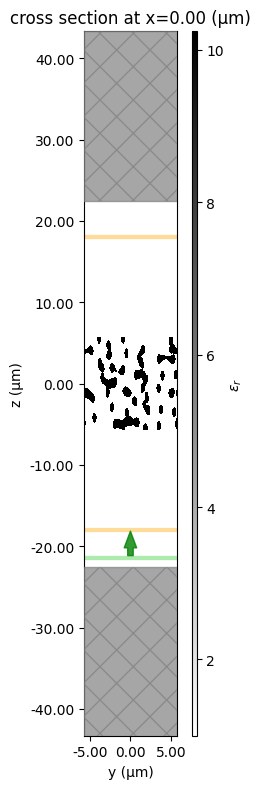

<Figure size 1600x1200 with 0 Axes>

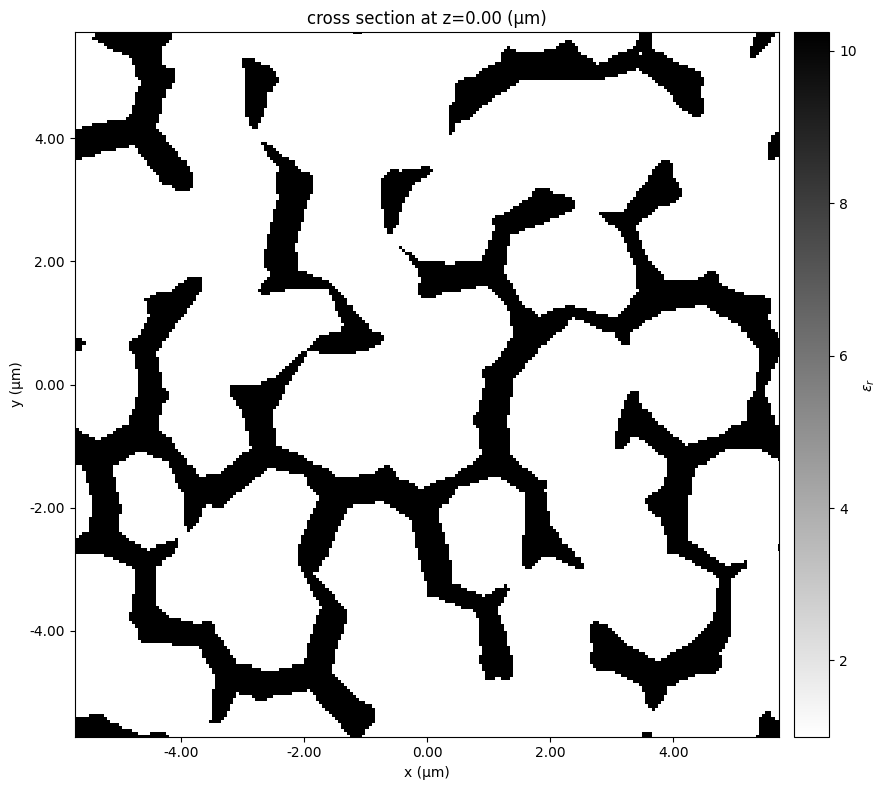

<Figure size 640x480 with 0 Axes>

In [7]:
structure_1.plot_sim_layout()